In [30]:
import numpy as np
import json
import os
from graph import Graph
from pagerank import PageRank
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# getting all the jsonl files path
path = '.\data'
data_path  = []
for file in os.listdir(path):
    new_path = os.path.join(path, file)
    for data_file in os.listdir(new_path):
        if data_file.endswith('jsonl'):
            data_path.append(os.path.join(new_path, data_file))



In [17]:
# creating a dictionary that maps paper_id to paper_name and another dictionary that maps paper to its references
paper_names = {}
paper_references = {}

for file_path in data_path[:2000]:
    file = open(file_path)
    for j, line in enumerate(file.readlines()):
        
        data = json.loads(line)
        
        paper_name = ' '.join(data['metadata']['title'].split())
        paper_id = data['paper_id']
        
        paper_names[paper_id] = paper_name
        
        # reference_ids = [id for id in [i['ids']['arxiv_id'] for i in data['bib_entries'].values()] if i]
        
        ref_id = []
        for references in data['bib_entries'].values():
            
            if 'ids' in references.keys():
                # print(references['bib_entry_raw'], references['ids']['arxiv_id'], references['ids']['arxiv_id'])
                id = references['ids']['arxiv_id']
                ref_id.append(id)
                
                # try:
                #     float(id)
                # except:
                #     continue
        
        ref_id = [id for id in ref_id if id]
        
        if len(ref_id) > 0:        
            paper_references[paper_id] = ref_id

In [18]:
len(paper_references)

9343

In [19]:
# count the number of references. Only those references present in paper_names are counted
ref_count = {}
not_in_dict = {}
for ref_list in paper_references.values():
    for ref in ref_list:
        if ref in ref_count:
            ref_count[ref] += 1
        elif ref in paper_names.keys():
            ref_count[ref] = 1
        else:
            if ref in not_in_dict:
                not_in_dict[ref] += 1
            else:
                not_in_dict[ref] = 1

In [20]:
# removing the references other than those present in paper_names
for k, v in paper_references.items():
    paper_references[k] = [value for value in v if value in ref_count.keys()]
    
# removing the papers with 0 references
new_ref_dict = {k:v for k,v in paper_references.items() if len(v) > 0}


In [21]:
count = 0
for k, v in ref_count.items():
    count += v
print(count)
count = 0
for k, v in paper_references.items():
    count += len(v)
print(count)
count = 0
for k, v in new_ref_dict.items():
    count += len(v)
print(count)

1527
1527
1527


In [22]:
len(paper_names), len(new_ref_dict), len(ref_count)

(19241, 1136, 890)

In [23]:
# creating the a new list of papers those are present in the paper and reference list
new_paper_names = {}
for key, value in paper_names.items():
    if key in new_ref_dict.keys():
        new_paper_names[key] = value
    else:
        for refs in new_ref_dict.values():
            if key in refs:
                new_paper_names[key] = value
                break
            
len(new_paper_names)

1798

In [24]:
# checking if all the references are int the new list
for k,v in ref_count.items():
    if k not in new_paper_names.keys():
        print(k)

# checking if all the original papers are on the new list
for k, v in new_ref_dict.items():
    if k not in new_paper_names.keys():
        print(k)

In [ ]:
# checking papers that are present just as a reference
for k, v in new_ref_dict.items():
    for refs in v:
        if ref not in new_ref_dict.keys():
            print(refs)

In [ ]:
# checking if original papers are present as a reference
for k, v in new_ref_dict.items():
    if k in ref_count.keys():
        print(k)

In [27]:
# creating graph and adding every paper as a node
graph = Graph()
for paper_id, paper_name in new_paper_names.items():
    graph.create_node(paper_id, paper_name)

for from_id, references in new_ref_dict.items():
    for to_id in references:
        graph.add_edge(from_id, to_id)

In [28]:
pg = PageRank(graph)

pg.update_rank(100)

In [29]:
pg.change_cache

array([1.17139897e+03, 6.73840492e+02, 9.33408506e+01, 2.71625668e+01,
       1.25575038e+01, 6.53924298e+00, 4.74738098e+00, 3.55791716e+00,
       2.99711633e+00, 2.52817236e+00, 2.14587188e+00, 1.81816381e+00,
       1.54477641e+00, 1.31110941e+00, 1.11424040e+00, 9.46391545e-01,
       8.04335953e-01, 6.83400940e-01, 5.80829749e-01, 4.93579069e-01,
       4.19499721e-01, 3.56511577e-01, 3.03004443e-01, 2.57518120e-01,
       2.18868497e-01, 1.86016051e-01, 1.58097830e-01, 1.34368431e-01,
       1.14201745e-01, 9.70613124e-02, 8.24938661e-02, 7.01126070e-02,
       5.95897569e-02, 5.06461681e-02, 4.30449384e-02, 3.65845173e-02,
       3.10937303e-02, 2.64270202e-02, 2.24607211e-02, 1.90897011e-02,
       1.62246234e-02, 1.37895499e-02, 1.17199455e-02, 9.96095717e-03,
       8.46596700e-03, 7.19535228e-03, 6.11543789e-03, 5.19760240e-03,
       4.41752029e-03, 3.75451678e-03, 3.19102016e-03, 2.71209592e-03,
       2.30505103e-03, 1.95909746e-03, 1.66506633e-03, 1.41516487e-03,
      

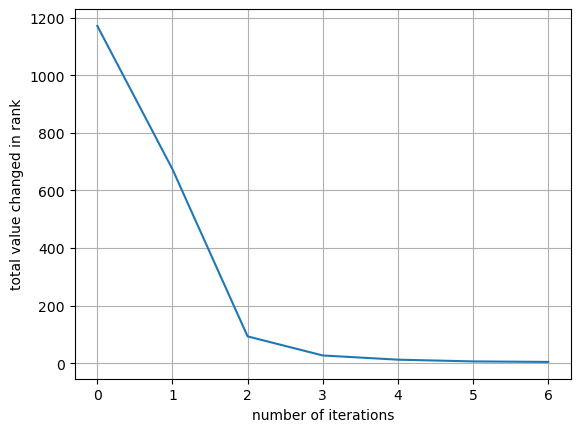

In [31]:
plt.plot(pg.change_cache[:7])
plt.grid()
plt.ylabel("total value changed in rank")
plt.xlabel('number of iterations')
plt.show()

In [96]:
nodes_in_order = pg.get_nodes(ascending=False)
nodes_in_order

[['0805.1178',
  'Cosmological bounce from a deformed Heisenberg algebra',
  array([3.68556507])],
 ['0905.0129',
  'Correlations, Risk and Crisis: From Physiology to Finance',
  array([3.63631826])],
 ['1205.4666',
  'A Generalization of the Goldberg-Sachs Theorem and its Consequences',
  array([3.52599236])],
 ['1204.5133',
  'Weyl Tensor Classification in Four-dimensional Manifolds of All Signatures',
  array([3.51608559])],
 ['0905.3937',
  'Incompressible limit of the compressible magnetohydrodynamic equations with vanishing viscosity coefficients',
  array([3.42032616])],
 ['0812.3755',
  'Modification of Heisenberg uncertainty relations in non-commutative Snyder space-time geometry',
  array([3.40990462])],
 ['1303.1364', 'On the tensor degree of finite groups', array([3.12308169])],
 ['0904.3670',
  'Topological Black Holes in Horava-Lifshitz Gravity',
  array([2.65738259])],
 ['1404.6517',
  'Interior Estimates for Generalized Forchheimer Flows of Slightly Compressible Fluids'

In [97]:
temp = list(ref_count.copy().items())
temp.sort(key=lambda x: x[1], reverse=True)
temp

[('0805.2220', 12),
 ('1001.3470', 10),
 ('0809.3497', 9),
 ('1004.0627', 9),
 ('1007.0935', 9),
 ('1205.2943', 9),
 ('0809.3498', 8),
 ('0810.3310', 8),
 ('0803.3299', 7),
 ('0905.3937', 7),
 ('0901.3589', 7),
 ('0802.1238', 7),
 ('1105.6086', 7),
 ('1008.5256', 7),
 ('1202.1234', 7),
 ('1505.06396', 7),
 ('0805.1178', 6),
 ('0904.3670', 6),
 ('1102.3129', 6),
 ('1101.0649', 6),
 ('1101.5280', 6),
 ('1201.5108', 6),
 ('1110.3410', 6),
 ('1207.0392', 6),
 ('1511.04771', 6),
 ('1607.04696', 6),
 ('1707.09861', 6),
 ('1410.7635', 6),
 ('1805.06550', 6),
 ('1807.02255', 6),
 ('0901.2258', 5),
 ('0811.4459', 5),
 ('1303.1364', 5),
 ('1205.4666', 5),
 ('1207.2507', 5),
 ('1204.5133', 5),
 ('0812.5108', 5),
 ('1301.2016', 5),
 ('0911.1856', 5),
 ('1407.7408', 5),
 ('1504.06938', 5),
 ('1608.00287', 5),
 ('1604.07172', 5),
 ('1703.09130', 5),
 ('0803.3460', 4),
 ('0809.1130', 4),
 ('0805.2799', 4),
 ('0806.2274', 4),
 ('1112.3988', 4),
 ('0809.1508', 4),
 ('0808.3417', 4),
 ('1004.0900', 4),
